In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Goals
- Create time-series graph of incidence trends from SEER*Stat 
- Determine whether there is a signifiant difference in malignant breast cancer incidence between Black and other persons from 1975-2018

## Cleaning Steps
- First two rows are summaries for the data from years 1975-2018 so I'll have to remove them
- year of diagnosis should start from 1975 at row index 2 and should end at 2018

In [67]:
def clean_df(file):
    data = pd.read_csv(file)
    df = data.iloc[2:] # dropping first two rows
    df.reset_index(drop=True, inplace=True)
    df['Year'] = df.apply(lambda x: x['Year of diagnosis'] + 1973, axis=1)
#     df['Age-Adjusted Rate/Trend'] = df['Age-Adjusted Rate/Trend'].astype('float')
    df[df.columns[1:5]] = df.iloc[:, 1:5].astype('float')
    return df

def error_bars(df):
    lower_ci = df['Lower Confidence Interval']
    upper_ci = df['Upper Confidence Interval']
    lower_err = (lower_ci - df['Age-Adjusted Rate/Trend']).abs() 
    upper_err = (upper_ci - df['Age-Adjusted Rate/Trend']).abs() 
    return [lower_err, upper_err]

In [68]:
df_all = clean_df('data/malignant_female_breast_incidence_trends.csv')
df_b = clean_df('data/malignant_black_female_breast_incidence.csv')
df_nonb = clean_df('data/malignant_nonblack_female_breast_incidence.csv')

/gpfs/home/cchae2/datavenv/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [69]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year of diagnosis          44 non-null     int64  
 1   Age-Adjusted Rate/Trend    44 non-null     float64
 2   Standard Error             44 non-null     float64
 3   Lower Confidence Interval  44 non-null     float64
 4   Upper Confidence Interval  44 non-null     float64
 5   Year                       44 non-null     int64  
dtypes: float64(4), int64(2)
memory usage: 2.2 KB


In [70]:
df_all.head()

,Year of diagnosis,Age-Adjusted Rate/Trend,Standard Error,Lower Confidence Interval,Upper Confidence Interval,Year
0,2,105.1,1.1,103.0,107.2,1975
1,3,102.0,1.1,99.9,104.1,1976
2,4,100.8,1.1,98.7,102.9,1977
3,5,100.6,1.0,98.6,102.7,1978
4,6,102.1,1.0,100.1,104.1,1979


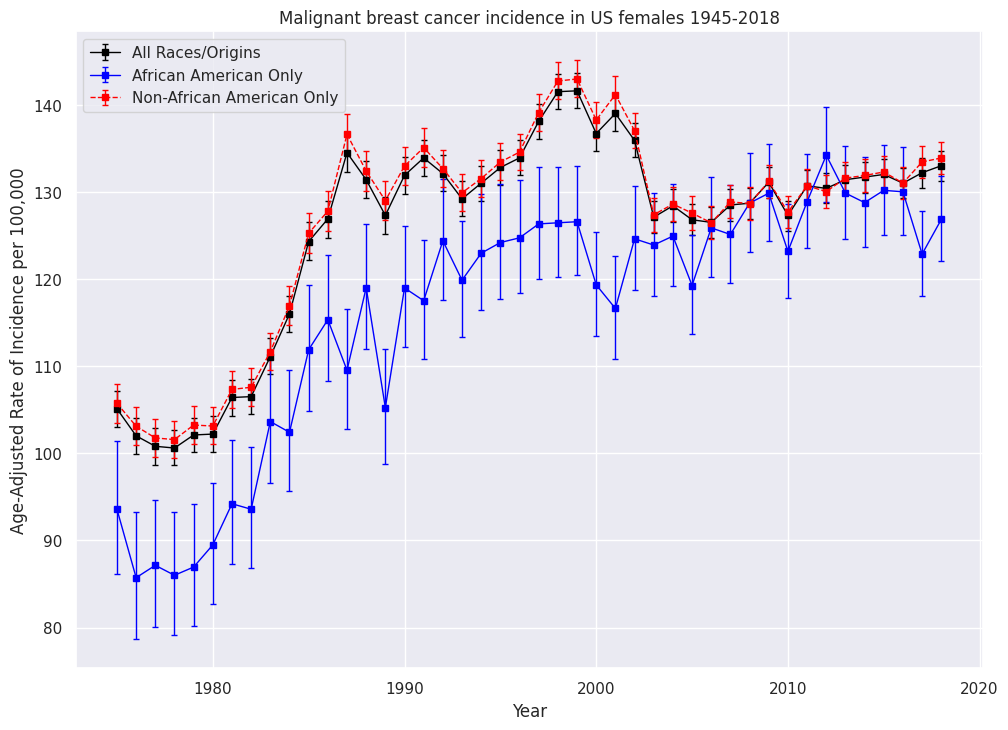

In [79]:
plt.errorbar(x=df_all.Year, 
             y=df_all['Age-Adjusted Rate/Trend'], 
             yerr=error_bars(df_all),
             label='All Races/Origins',
             marker='s', capsize=2,
             color='black', markersize=4, linewidth=1)
plt.errorbar(x=df_b.Year, 
             y=df_b['Age-Adjusted Rate/Trend'], 
             yerr=error_bars(df_b),
             label='African American Only',
             marker='s', capsize=2,
             color='blue', markersize=4, linewidth=1)
plt.errorbar(x=df_nonb.Year, 
             y=df_nonb['Age-Adjusted Rate/Trend'], 
             yerr=error_bars(df_nonb),
             label='Non-African American Only',
             marker='s', capsize=2,
             color='red', markersize=4, linewidth=1, linestyle='--')
plt.title('Malignant breast cancer incidence in US females 1945-2018')
plt.xlabel('Year')
plt.ylabel('Age-Adjusted Rate of Incidence per 100,000')
plt.legend()
plt.show()